In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
  Rolling back uninstall of numpy
  Moving to c:\python311\lib\site-packages\numpy-1.26.2-cp311-cp311-win_amd64.whl
   from C:\Users\En.Yara\AppData\Local\Temp\pip-uninstall-nm72j5i1\numpy-1.26.2-cp311-cp311-win_amd64.whl
  Moving to c:\python311\lib\site-packages\numpy-1.26.2.dist-info\
   from C:\Python311\Lib\site-packages\~umpy-1.26.2.dist-info
  Moving to c:\python311\lib\site-packages\numpy.libs\
   from C:\Python311\Lib\site-packages\~umpy.libs
  Moving to c:\python311\lib\site-packages\numpy\
   from C:\Python311\Lib\site-packages\~umpy
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\f2py.exe' -> 'c:\\Python311\\Scripts\\f2py.exe.deleteme'



Note: you may need to restart the kernel to use updated packages.


In [5]:
plt.style.use('fivethirtyeight')
file = 'C:\\Users\\En.Yara\\Desktop\\HackTrick24\\Solvers\\series_data.csv'

df = pd.read_csv(file)

In [6]:
df['timestamp'] = pd.DatetimeIndex(df['timestamp'])
df.dtypes
df = df.rename(columns={'timestamp': 'ds',
                        'visits': 'y'})



df.head()

,ds,y
0,2015-07-01,4
1,2015-07-02,8
2,2015-07-03,4
3,2015-07-04,9
4,2015-07-05,7


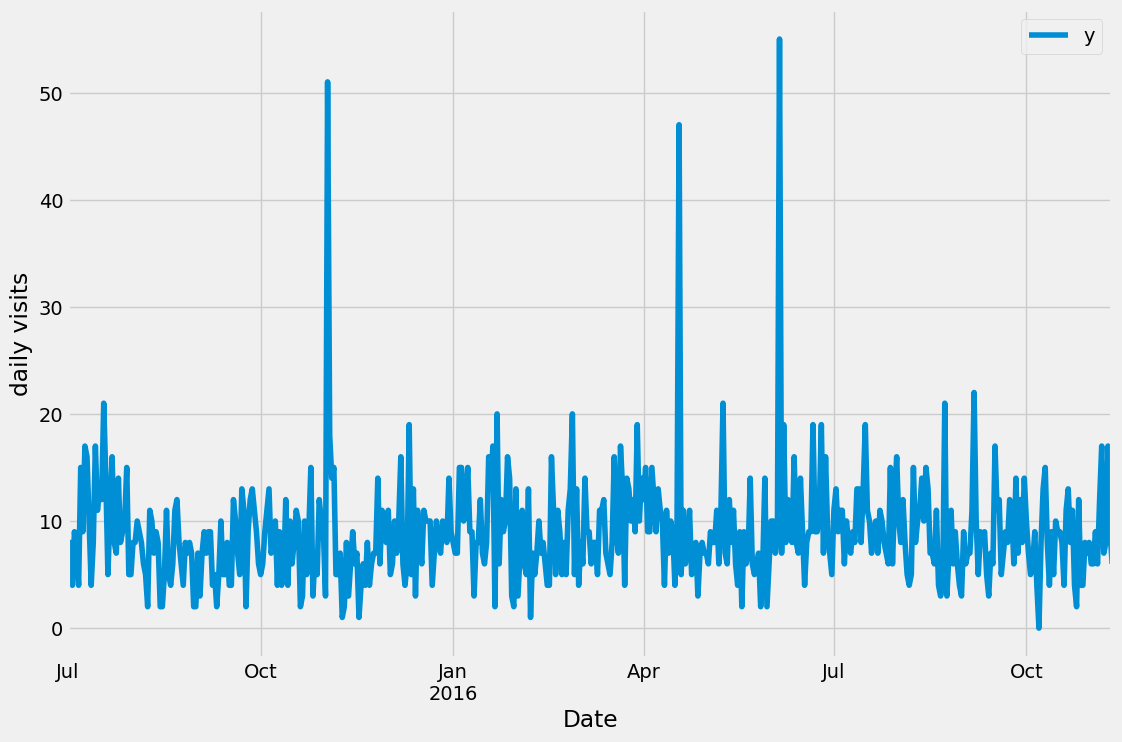

In [7]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('daily visits')
ax.set_xlabel('Date')

plt.show()

In [8]:
future_dates = pd.date_range(start='2016-11-12', periods=50)
future = pd.DataFrame({'ds': future_dates})

future.head()

,ds
0,2016-11-12
1,2016-11-13
2,2016-11-14
3,2016-11-15
4,2016-11-16


In [9]:

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.01, 0.1, 0.5,1,10,30],
    'seasonality_prior_scale': [1, 10, 30],
}


# Helper function to evaluate the model
def evaluate_model(model, metric_func):
    df_cv = cross_validation(model, initial='400 days', period='100 days', horizon='50 days')
    return metric_func(df_cv['y'], df_cv['yhat'])


# Grid search
best_params = {}
best_score = float('inf')


for mode in param_grid['seasonality_mode']:
    for cps in param_grid['changepoint_prior_scale']:
        for sps in param_grid['seasonality_prior_scale']:
            # Create a model with the current hyperparameters
            model = Prophet(seasonality_mode=mode, changepoint_prior_scale=cps, seasonality_prior_scale=sps)
            model.fit(df)

            # Evaluate the model using Mean Absolute Error (MAE)
            score = evaluate_model(model, mean_absolute_error)

            # Update best parameters if necessary
            if score < best_score:
                best_score = score
                best_params = {
                    'seasonality_mode': mode,
                    'changepoint_prior_scale': cps,
                    'seasonality_prior_scale': sps
                }

print(best_params)
print(best_score)

# Create the best model with the optimal hyperparameters
best_model = Prophet(**best_params)
best_model.fit(df)

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
20:17:31 - cmdstanpy - INFO - Chain [1] start processing
20:17:31 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]20:17:32 - cmdstanpy - INFO - Chain [1] start processing
20:17:32 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]
20:17:32 - cmdstanpy - INFO - Chain [1] start processing
20:17:32 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]20:17:33 - cmdstanpy - INFO - Chain [1] start processing
20:17:33 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:05<00:00,  5.90s/it]
20:17:39 - cmdstanpy - INFO - Chain [1] start processing
20:17:39 - cmdstanpy - INFO - C

{'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10}
2.8612760634421766


20:18:52 - cmdstanpy - INFO - Chain [1] start processing
20:18:52 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have created and fitted your Prophet model
  # Assuming df is your DataFrame with 'ds' and 'y' columns

horizon = '50 days'
period = '100 days'
initial = '400 days'

# Perform cross-validation
df_cv = cross_validation(best_model, horizon=horizon, period=period, initial=initial)

# Calculate performance metrics
df_p = performance_metrics(df_cv, rolling_window=0.1)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(df_cv)


  0%|          | 0/1 [00:00<?, ?it/s]20:18:55 - cmdstanpy - INFO - Chain [1] start processing
20:18:55 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:01<00:00,  1.22s/it]


Mean Absolute Error: 2.86
Mean Squared Error: 13.71
Root Mean Squared Error: 3.70
           ds      yhat  yhat_lower  yhat_upper   y     cutoff
0  2016-09-23  8.270186    1.846189   14.495318  12 2016-09-22
1  2016-09-24  8.505762    2.120056   14.944732  11 2016-09-22
2  2016-09-25  8.897584    2.426018   15.290964   6 2016-09-22
3  2016-09-26  8.758171    2.280995   15.332200  14 2016-09-22
4  2016-09-27  8.415674    1.891970   15.155141   7 2016-09-22
5  2016-09-28  7.397250    0.283377   14.076332  12 2016-09-22
6  2016-09-29  7.829822    1.266815   14.512678   8 2016-09-22
7  2016-09-30  8.142462    1.736237   14.948314  14 2016-09-22
8  2016-10-01  8.378038    2.021772   15.146511  10 2016-09-22
9  2016-10-02  8.769860    2.424165   15.251340   7 2016-09-22
10 2016-10-03  8.630448    2.018401   15.798232   5 2016-09-22
11 2016-10-04  8.287951    2.041286   15.543452   6 2016-09-22
12 2016-10-05  7.269527    0.838186   14.219264   9 2016-09-22
13 2016-10-06  7.702098    0.926202 

c:\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


[8.0,
 9.0,
 8.0,
 8.0,
 7.0,
 7.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 7.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 7.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 7.0,
 7.0,
 7.0,
 7.0,
 8.0]

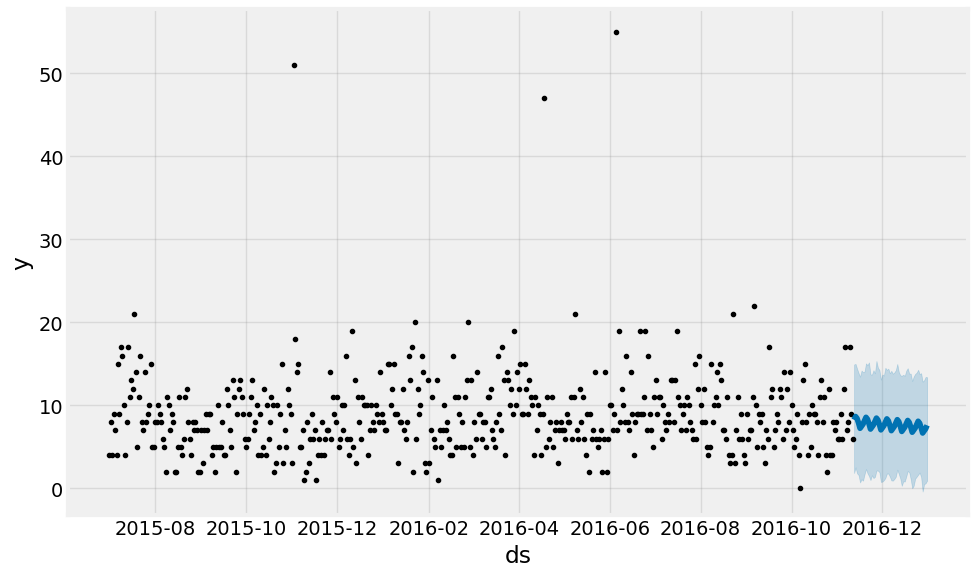

In [11]:
def results(days):
    future_dates = pd.date_range(start='2016-11-12', periods=days)
    future = pd.DataFrame({'ds': future_dates})


    forecast = best_model.predict(future[['ds']])

    # Visualize the forecast
    fig = best_model.plot(forecast)
    forecast[['ds', 'yhat']]
    return forecast['yhat'].round().tolist()
results(50)

In [13]:
import pickle
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)



